In [1]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_slice
from optuna.visualization.matplotlib import plot_contour
from optuna.storages import JournalStorage, JournalFileStorage

In [2]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

## Load the hyperparameter evolution results with Optuna 

In [3]:
env_id = "Swimmer-v4"
h_test = '1_RES'
tr_steps = 300_000

exp_name = f"{env_id}_{h_test}_{tr_steps//1000}k_steps"
logdir = f"logs/{exp_name}/"
models_dir = f"models/{exp_name}/"

print(exp_name)

Swimmer-v4_1_RES_300k_steps


In [4]:
log_name = f"optuna-journal_{exp_name}.log"
storage = JournalStorage(JournalFileStorage(log_name))

/tmp/ipykernel_8471/3976810998.py:2: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  storage = JournalStorage(JournalFileStorage(log_name))


In [5]:
print(log_name)

optuna-journal_Swimmer-v4_1_RES_300k_steps.log


In [6]:
study = optuna.load_study(
    study_name = f'{exp_name}',
    storage = storage
)

print(study.best_params)

{'iss': 1.4303466460332108, 'sr': 1.0177517372871698, 'lr': 0.2587104250497556}


In [7]:
print(len(study.trials))

1104


## Plot and analyze them

- Most of these functions cannot be rendered on a jupyter notebook on github, but you can still execute them when you will have loaded the desired Optuna study. 

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
fig = plot_contour(study, params=["lr", "sr"])

In [ ]:
plot_slice(study)

## Plot and analyze the ER-MRL agents results

In [14]:
from ER_MRL import plot_results

In [15]:
models = ['PPO', 'RES_PPO_0.0003', 'RES_PPO_0.0001']
nb_seeds = 5

In [16]:
h_test = '1_RES'

exp_name = f"{env_id}_{h_test}"
logdir = f"logs/{exp_name}/"
models_dir = f"models/{exp_name}/"

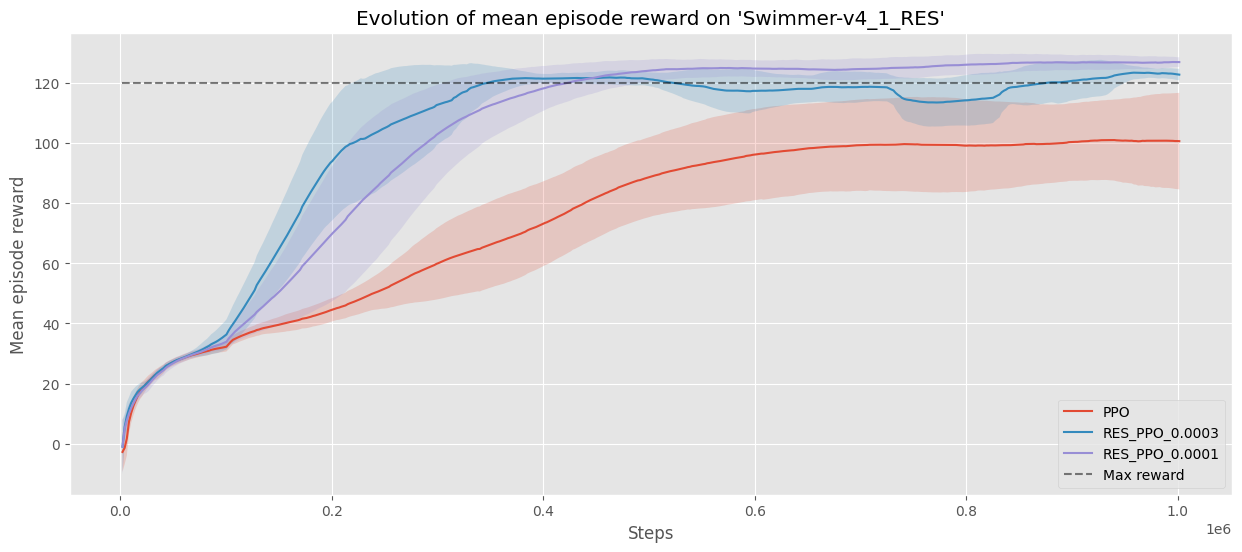

In [19]:
plot_results(exp_name, logdir, models, nb_seeds, max_reward=120)